# Assignment #5 - Jackie Woodlief & Jeff Sharpe

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, Imputer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

/home/shelob/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [96]:
# Since we have 14 airlines, we need to have 14 plt.plot() methods

def plot_dataset(X, y, axes, col1, col2):
    plt.plot(X[:, col1][y==0], X[:, col2][y==0], "gv")
    plt.plot(X[:, col1][y==1], X[:, col2][y==1], "c^")
    plt.plot(X[:, col1][y==2], X[:, col2][y==2], "m<")
    plt.plot(X[:, col1][y==3], X[:, col2][y==3], "yv")
    plt.plot(X[:, col1][y==4], X[:, col2][y==4], "k3")
    plt.plot(X[:, col1][y==5], X[:, col2][y==5], "wo")
    plt.plot(X[:, col1][y==6], X[:, col2][y==6], "bd")
    plt.plot(X[:, col1][y==7], X[:, col2][y==7], "ro")
    plt.plot(X[:, col1][y==8], X[:, col2][y==8], "gd")
    plt.plot(X[:, col1][y==9], X[:, col2][y==9], "gs")
    plt.plot(X[:, col1][y==10], X[:, col2][y==10], "bo")
    plt.plot(X[:, col1][y==11], X[:, col2][y==11], "rv")
    plt.plot(X[:, col1][y==12], X[:, col2][y==12], "c3")
    plt.plot(X[:, col1][y==13], X[:, col2][y==13], "g.")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(x_train.columns[col1], fontsize=20)
    plt.ylabel(x_train.columns[col2], fontsize=20, rotation=90)


In [2]:
# Let's go ahead and set the random seed to one so we can get consistent results

tf.set_random_seed(1) # I don't even know if this works

# Big Picture

Based on the past performance of the 2015 flight dataset (from assignment 3), we saw that the non-linear SVM's performed well on the data set; however, that was due in part because we reduced the size of our data set by quite a bit. If the Gaussian RBF with grid search can yield such good results on a small - medium size and complex data set, we can imagine that since neural networks are better at dealing with large, complex data sets, then the performance may even improve. The main reason being is that there will be more data. With such a big, complex data set, a neural network seems like the most appropriate approach.

compare 2 different airlines, maybe

# Get the Data / Info

We are using the flight data set because it is our largest data set, it's massive, with almost 6,000,000 rows and 31 columns. In the past we couldn't use the entire data set because it was too big for our computers to handle efficiently. In addition, we already know that this is a complex data set due to our past assignments involving it and visualizing it.



https://www.kaggle.com/usdot/flight-delays/data

Click on the above link, and download flights.csv, as that is the data set I used for this assignment!

In [3]:
 #Let's read in our data

flights_data = pd.read_csv("flights.csv")

/home/shelob/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train_set_throwaway, flights = train_test_split(flights_data, test_size = 0.17, random_state = 42)
del train_set_throwaway # since we don't them, we can go ahead and delete them from the memory!

In [5]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989244 entries, 1508570 to 1367429
Data columns (total 31 columns):
YEAR                   989244 non-null int64
MONTH                  989244 non-null int64
DAY                    989244 non-null int64
DAY_OF_WEEK            989244 non-null int64
AIRLINE                989244 non-null object
FLIGHT_NUMBER          989244 non-null int64
TAIL_NUMBER            986799 non-null object
ORIGIN_AIRPORT         989244 non-null object
DESTINATION_AIRPORT    989244 non-null object
SCHEDULED_DEPARTURE    989244 non-null int64
DEPARTURE_TIME         974729 non-null float64
DEPARTURE_DELAY        974729 non-null float64
TAXI_OUT               974222 non-null float64
WHEELS_OFF             974222 non-null float64
SCHEDULED_TIME         989244 non-null float64
ELAPSED_TIME           971487 non-null float64
AIR_TIME               971487 non-null float64
DISTANCE               989244 non-null int64
WHEELS_ON              973616 non-null float64
TAXI_IN

In [6]:
flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,989244.0,989244.000000,989244.000000,989244.000000,989244.000000,989244.00000,974729.000000,974729.000000,974222.000000,974222.000000,...,989244.000000,973616.000000,971487.000000,989244.000000,989244.000000,180586.000000,180586.000000,180586.000000,180586.000000,180586.000000
mean,2015.0,6.521581,15.705901,3.924253,2171.461972,1329.54379,1335.244998,9.376492,16.075074,1357.214071,...,1493.999944,1476.876830,4.422846,0.002609,0.015341,13.449121,0.074607,18.991876,23.515284,2.972323
std,0.0,3.405019,8.783922,1.988866,1756.456337,483.62175,496.297124,37.207911,8.924512,497.906636,...,507.128619,526.259036,39.373835,0.051012,0.122905,27.929466,1.945797,49.031444,42.955290,20.579862
min,2015.0,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,-47.000000,1.000000,1.000000,...,1.000000,1.000000,-82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,4.000000,8.000000,2.000000,730.000000,917.00000,921.000000,-5.000000,11.000000,935.000000,...,1110.000000,1059.000000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,7.000000,16.000000,4.000000,1689.000000,1325.00000,1330.000000,-2.000000,14.000000,1343.000000,...,1520.000000,1513.000000,-5.000000,0.000000,0.000000,2.000000,0.000000,2.000000,3.000000,0.000000
75%,2015.0,9.000000,23.000000,6.000000,3225.000000,1730.00000,1739.000000,7.000000,19.000000,1754.000000,...,1918.000000,1917.000000,8.000000,0.000000,0.000000,18.000000,0.000000,19.000000,29.000000,0.000000
max,2015.0,12.000000,31.000000,7.000000,7438.000000,2359.00000,2400.000000,1670.000000,225.000000,2400.000000,...,2359.000000,2400.000000,1665.000000,1.000000,1.000000,1101.000000,221.000000,1665.000000,1294.000000,937.000000


In [7]:
flights.head(5)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
1508570,2015,4,7,2,EV,4900,N759EV,FWA,DTW,1340,...,1423.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
363270,2015,1,24,6,AS,611,N413AS,LAS,SEA,1910,...,2133.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3003945,2015,7,8,3,WN,1483,N463WN,OAK,SEA,630,...,812.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2291425,2015,5,26,2,WN,193,N7745A,STL,DAL,810,...,1222.0,152.0,0,0,NaN,0.0,0.0,0.0,152.0,0.0
2973084,2015,7,6,1,UA,253,N213UA,IAH,HNL,1000,...,1316.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Let's make a copy just in case we need to refer back to the original

copy = pd.DataFrame.copy(flights)

In [9]:
# Based on the correlation matrix of airlines, used from a previous run, we determined that these features
# we not very correlated with determining the airline, so we decided to drop these features

copy = copy.drop("CANCELLATION_REASON", 1)
copy = copy.drop("YEAR", 1)
copy = copy.drop("DAY", 1)
copy = copy.drop("MONTH", 1)
copy = copy.drop("DAY_OF_WEEK", 1)
copy = copy.drop("DIVERTED", 1)
copy = copy.drop("CANCELLED", 1)
copy = copy.drop("AIR_SYSTEM_DELAY", 1)
copy = copy.drop("SECURITY_DELAY", 1)
copy = copy.drop("WHEELS_OFF", 1)
copy = copy.drop("SCHEDULED_DEPARTURE", 1)
copy = copy.drop("WEATHER_DELAY", 1)
copy = copy.drop("AIRLINE_DELAY", 1)
copy = copy.drop("WHEELS_ON", 1)
copy = copy.drop("SCHEDULED_ARRIVAL", 1)
copy = copy.drop("ARRIVAL_TIME", 1)
copy = copy.drop("DEPARTURE_TIME", 1)
copy = copy.drop("LATE_AIRCRAFT_DELAY", 1)
copy = copy.drop("ARRIVAL_DELAY", 1)
copy = copy.drop("DEPARTURE_DELAY", 1)

In [10]:
# copy = copy.reset_index(drop = True)

In [11]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 989244 entries, 1508570 to 1367429
Data columns (total 11 columns):
AIRLINE                989244 non-null object
FLIGHT_NUMBER          989244 non-null int64
TAIL_NUMBER            986799 non-null object
ORIGIN_AIRPORT         989244 non-null object
DESTINATION_AIRPORT    989244 non-null object
TAXI_OUT               974222 non-null float64
SCHEDULED_TIME         989244 non-null float64
ELAPSED_TIME           971487 non-null float64
AIR_TIME               971487 non-null float64
DISTANCE               989244 non-null int64
TAXI_IN                973616 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 90.6+ MB


In [12]:
encoder = LabelEncoder() #AIRLINE, DESTINATION_AIRPORT, ORIGIN_AIRPORT

In [13]:
airline_cat = copy["AIRLINE"]
destination_cat = copy["DESTINATION_AIRPORT"]
origin_cat = copy["ORIGIN_AIRPORT"]
tail_cat = copy["TAIL_NUMBER"]
flight_cat = copy["FLIGHT_NUMBER"]

In [14]:
destination_cat = destination_cat.apply(str)
origin_cat = origin_cat.apply(str)
flight_cat = flight_cat.apply(str)
tail_cat = tail_cat.apply(str)

In [15]:
# destination_cat = destination_cat.fillna('Other Dest')
# origin_cat = origin_cat.fillna('Other Org')

In [16]:
airline_cat_encoded = encoder.fit_transform(airline_cat)
destination_cat_encoded = encoder.fit_transform(destination_cat)
origin_cat_encoded = encoder.fit_transform(origin_cat)
tail_cat_encoded = encoder.fit_transform(tail_cat)
flight_cat_encoded = encoder.fit_transform(flight_cat)

In [17]:
copy["AIRLINE"]= airline_cat_encoded
copy["DESTINATION_AIRPORT"] = destination_cat_encoded
copy["ORIGIN_AIRPORT"] = origin_cat_encoded
copy["FLIGHT_NUMBER"] = flight_cat_encoded
copy["TAIL_NUMBER"] = tail_cat_encoded

In [18]:
copy.head(3)

,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN
1508570,4,4333,3386,422,396,13.0,56.0,48.0,30.0,128,5.0
363270,1,5669,1627,478,580,14.0,155.0,155.0,131.0,867,10.0
3003945,13,537,1788,526,580,8.0,110.0,106.0,92.0,672,6.0


In [19]:
imputer = Imputer(strategy = "median")

In [20]:
imputer.fit(copy)
X = imputer.transform(copy)
transform_copy = pd.DataFrame(X, columns = copy.columns)
transform_copy

,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN
0,4.0,4333.0,3386.0,422.0,396.0,13.0,56.0,48.0,30.0,128.0,5.0
1,1.0,5669.0,1627.0,478.0,580.0,14.0,155.0,155.0,131.0,867.0,10.0
2,13.0,537.0,1788.0,526.0,580.0,8.0,110.0,106.0,92.0,672.0,6.0
3,13.0,1033.0,3525.0,598.0,384.0,6.0,100.0,99.0,85.0,546.0,8.0
4,10.0,1700.0,582.0,455.0,444.0,16.0,498.0,488.0,461.0,3904.0,11.0
5,3.0,424.0,4787.0,450.0,323.0,13.0,70.0,49.0,28.0,151.0,8.0
6,10.0,510.0,714.0,455.0,606.0,13.0,137.0,120.0,100.0,787.0,7.0
7,1.0,6157.0,2090.0,581.0,542.0,11.0,171.0,163.0,145.0,1107.0,7.0
8,0.0,0.0,3667.0,470.0,479.0,34.0,385.0,381.0,341.0,2475.0,6.0
9,5.0,6383.0,567.0,251.0,80.0,9.0,249.0,222.0,204.0,1607.0,9.0


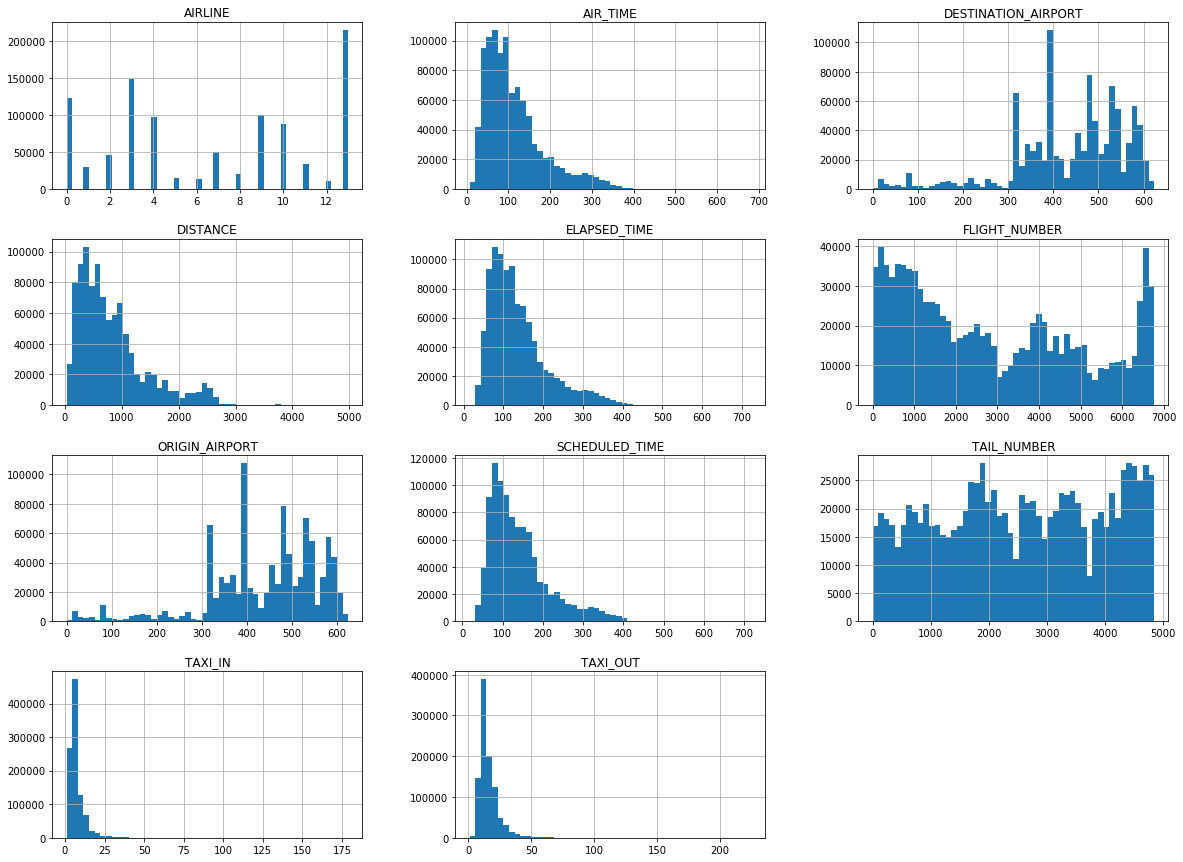

In [21]:
%matplotlib inline
transform_copy.hist(bins = 50, figsize = (20, 15))
plt.show()

In [22]:
correlation_matrix = transform_copy.corr()

In [23]:
correlation_matrix["AIRLINE"].sort_values(ascending = False)

AIRLINE                1.000000
FLIGHT_NUMBER          0.111047
TAIL_NUMBER            0.095959
ORIGIN_AIRPORT         0.076239
DESTINATION_AIRPORT    0.074975
TAXI_IN               -0.079668
DISTANCE              -0.082375
AIR_TIME              -0.086422
SCHEDULED_TIME        -0.105774
ELAPSED_TIME          -0.110566
TAXI_OUT              -0.170568
Name: AIRLINE, dtype: float64

In [24]:
train_set, test_set = train_test_split(transform_copy, test_size = 0.2, random_state = 42)

In [25]:
train_set.head(3)

,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN
882994,3.0,6402.0,1128.0,480.0,520.0,15.0,221.0,217.0,198.0,1670.0,4.0
249778,9.0,5083.0,3688.0,326.0,454.0,15.0,52.0,55.0,34.0,140.0,6.0
30609,12.0,6565.0,4007.0,582.0,539.0,11.0,100.0,94.0,81.0,550.0,2.0


In [26]:
test_set.head(3)

,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN
686489,13.0,3910.0,1668.0,526.0,495.0,8.0,200.0,206.0,193.0,1489.0,5.0
585468,0.0,2689.0,1390.0,263.0,214.0,17.0,255.0,245.0,210.0,1846.0,18.0
705282,9.0,4618.0,3148.0,455.0,331.0,16.0,227.0,208.0,187.0,1428.0,5.0


In [27]:
# Now we need to split up into test and train sets based on the airline (multi-class)

y_train = train_set["AIRLINE"]
y_test = test_set["AIRLINE"]
x_test = test_set.drop("AIRLINE", 1)
x_train = train_set.drop("AIRLINE", 1)


# We need to convert to float32 due to a warning we get when we do the dnn_clf
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.astype('float32')

In [28]:
y_train.head(2)

882994    3.0
249778    9.0
Name: AIRLINE, dtype: float32

In [29]:
x_train.head(2)

,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,TAXI_OUT,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN
882994,6402.0,1128.0,480.0,520.0,15.0,221.0,217.0,198.0,1670.0,4.0
249778,5083.0,3688.0,326.0,454.0,15.0,52.0,55.0,34.0,140.0,6.0


# Large-Scale Visualization

Below we will be visualizing different aspects of our data to demonstrate that it is in fact a complex data set!

As you can see, there isn't much separation, either linearly or non-linearly. There could be some separation among a couple of the airlines when looking at tail number, flight number but when you include the other data that is relevant to determining the airline, you can't rely on this data. This is made apparent later on because if this was the case with the flight and tail number, then you would get 100% accuracy everytime since you could just say that this tail number belongs to a plane of this airline; this isn't the case which leads us to believe that there isn't much separation even among the flight and tail number.

You'll notice that you will see a lot of blue and green, this has to do with the order that the plot is filled in. The airlines that are being represented by the blue and green markers are the last ones to be added to the plot, hence is why they seem to be overpowering the data set. We are also looking at almost a million entries, so that's a reason why it looks so crowded.

In [82]:
x_train.shape # 791,395 entries

(791395, 10)

In [97]:
x_train_copy = x_train.values #converting to numpy ndarray
y_train_copy = y_train.values

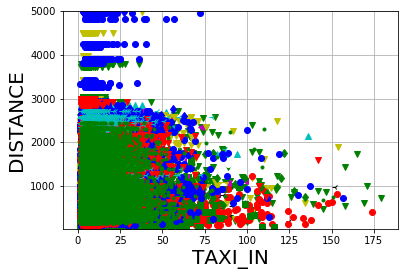

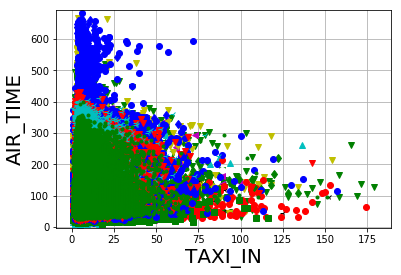

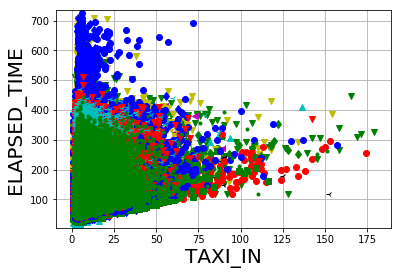

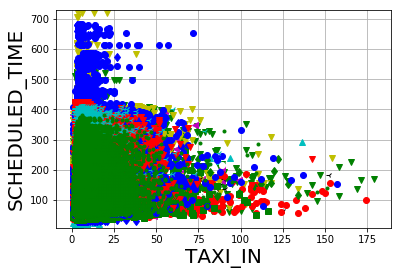

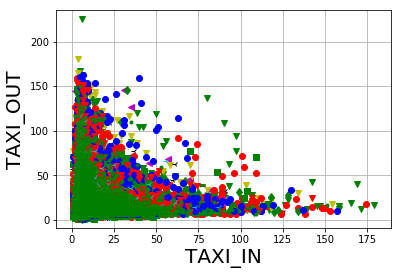

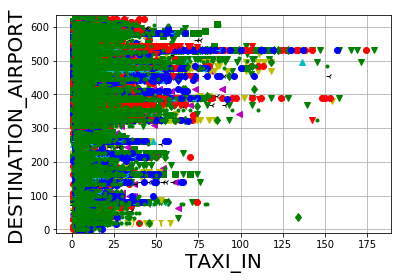

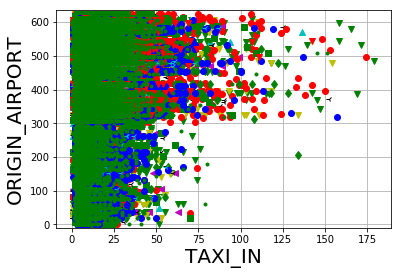

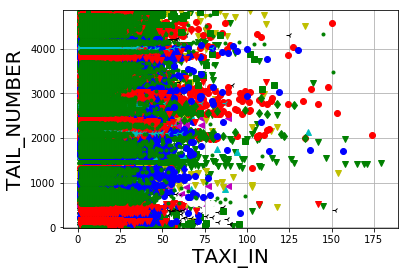

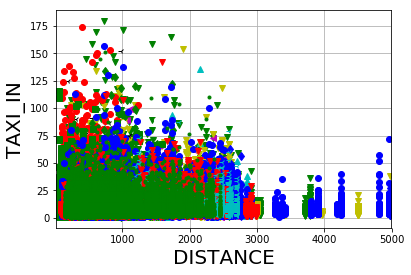

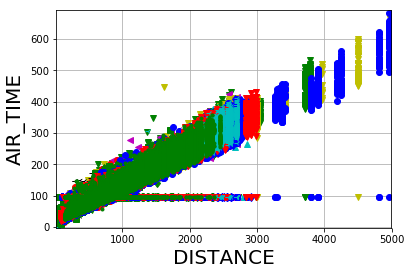

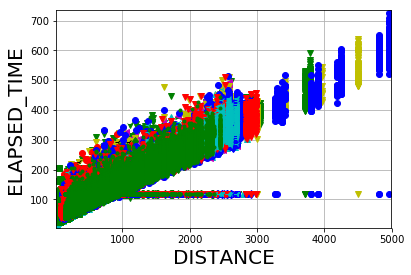

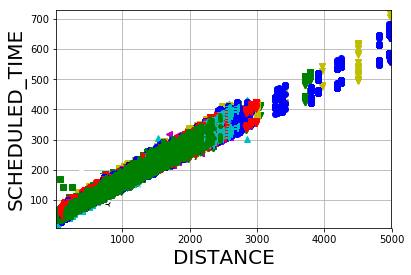

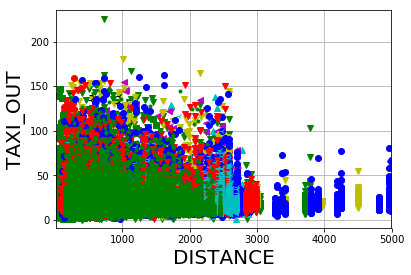

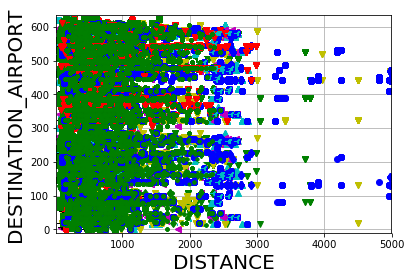

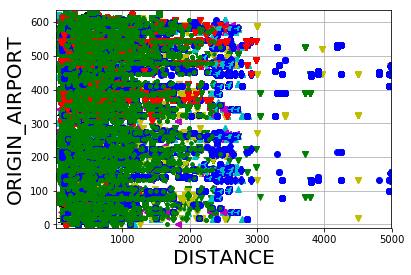

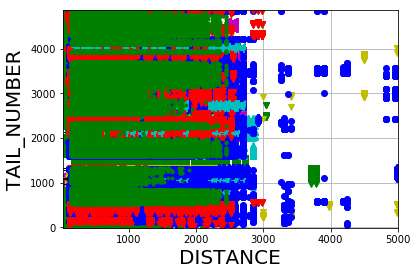

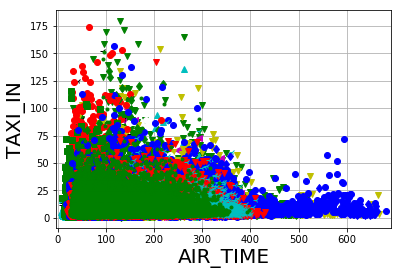

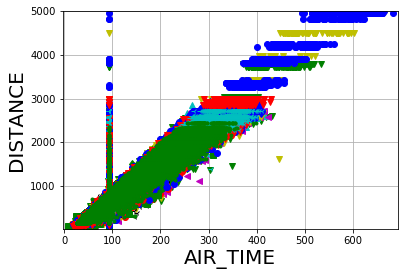

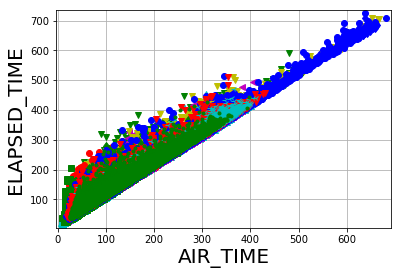

In [ ]:
for temp1 in range(9, 0, -1): # we use 9 here because we have 10 columns of data
    for temp2 in range(9, 0, -1):
        if (temp1 == temp2):
            print("")
        else:
            plot_dataset(x_train_copy, y_train_copy, [x_train_copy[:, temp1].min() - 10, x_train_copy[:, temp1].max() + 10, x_train_copy[:, temp2].min() - 10, x_train_copy[:, temp2].max() + 10], temp1, temp2) #Departure time and distance plotted
            plt.show()

# Converting y types

To get the program to work, we need to convert y_test and y_train to ints

In [30]:
# Before we do anything, in order to feed the various clf's our labels, we must first convert them from
# float to integers

y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

In [31]:
# x_train_ds = x_train.values
# x_test_ds = x_test.values

# Construction and Execution Phases

Using the built-in DNNClassifier(), the construction and execution phases are handled already.

## Fully connected network with 2 hidden layers

This is the neural network that we start with!

Also, just to note, since we don't specify here, the activation function being used is the relu (default)!

### Observations

First, we wanted to point out that we have the step size set to 50,000; however, the higher it is, the better performance it seems to get. We tested it at 100,000 and saw ~58% accuracy instead of ~53% at 50,000 steps (once at 50,000 steps we saw ~55% accuracy). We didn't test above 100,000 steps. The reason that we left it at 50,000 is so that it will execute faster. so 53-58% may not sound very accurate, but when you consider that we have 14 different airlines and that if you predicted only one of the fourteen for the test set, you would expect to see around a 7.14% accuracy (it depends on the distribution, this assumes that every airline is equally represented in the data set.) 

In [32]:
x_train.shape

(791395, 10)

In [33]:
# Since there are 14 different airlines, we need to change n_classes to 14, default seems to be 10
# NOTE: This will take a few minutes!!
# ALSO: The more steps you add, the better the accuracy is, however, we are going to put steps at 50,000
# so that it will not be an unreasonably long wait time!
# Steps = 100,000 equals 58% accuracy

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(x_train)
dnn_clf_hidden = tf.contrib.learn.DNNClassifier(hidden_units = [300, 150], n_classes = 14, feature_columns = feature_cols)
dnn_clf_hidden = tf.contrib.learn.SKCompat(dnn_clf_hidden)
dnn_clf_hidden.fit(x_train, y_train_int, batch_size = 50, steps = 50000) 
# 10,000 (46%); 15,000 (47%), 40,000 (50%); 50,000 (53%); 100,000 (58%)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2b8e446e80>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpdu3z1poh'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpdu3z1poh/model.ckpt.
INFO:tensorflow:loss = 338.58734, step = 1
INFO:tensorflow:global_step/sec: 84.1987
INFO:tensorflow:loss = 2.2785523, step = 101 (1.192 sec)
INFO:tensorflow:global_step/sec: 87.5981
INFO:tensorflow:loss

INFO:tensorflow:global_step/sec: 87.1422
INFO:tensorflow:loss = 1.7104034, step = 7301 (1.148 sec)
INFO:tensorflow:global_step/sec: 88.4105
INFO:tensorflow:loss = 1.203406, step = 7401 (1.131 sec)
INFO:tensorflow:global_step/sec: 88.029
INFO:tensorflow:loss = 1.4716808, step = 7501 (1.134 sec)
INFO:tensorflow:global_step/sec: 89.6267
INFO:tensorflow:loss = 1.6916428, step = 7601 (1.116 sec)
INFO:tensorflow:global_step/sec: 87.0659
INFO:tensorflow:loss = 1.5816171, step = 7701 (1.149 sec)
INFO:tensorflow:global_step/sec: 86.4407
INFO:tensorflow:loss = 1.58824, step = 7801 (1.156 sec)
INFO:tensorflow:global_step/sec: 89.557
INFO:tensorflow:loss = 1.8060086, step = 7901 (1.118 sec)
INFO:tensorflow:global_step/sec: 88.936
INFO:tensorflow:loss = 1.746879, step = 8001 (1.123 sec)
INFO:tensorflow:global_step/sec: 90.2542
INFO:tensorflow:loss = 1.6606097, step = 8101 (1.108 sec)
INFO:tensorflow:global_step/sec: 87.5186
INFO:tensorflow:loss = 1.7601298, step = 8201 (1.143 sec)
INFO:tensorflow:g

INFO:tensorflow:global_step/sec: 79.7711
INFO:tensorflow:loss = 1.7432317, step = 15601 (1.255 sec)
INFO:tensorflow:global_step/sec: 82.3704
INFO:tensorflow:loss = 1.5274211, step = 15701 (1.213 sec)
INFO:tensorflow:global_step/sec: 86.0635
INFO:tensorflow:loss = 1.5615784, step = 15801 (1.163 sec)
INFO:tensorflow:global_step/sec: 84.5191
INFO:tensorflow:loss = 1.5279052, step = 15901 (1.182 sec)
INFO:tensorflow:global_step/sec: 89.0711
INFO:tensorflow:loss = 1.5058185, step = 16001 (1.124 sec)
INFO:tensorflow:global_step/sec: 86.2962
INFO:tensorflow:loss = 1.6916344, step = 16101 (1.158 sec)
INFO:tensorflow:global_step/sec: 92.6751
INFO:tensorflow:loss = 1.4091972, step = 16201 (1.079 sec)
INFO:tensorflow:global_step/sec: 92.827
INFO:tensorflow:loss = 1.34786, step = 16301 (1.078 sec)
INFO:tensorflow:global_step/sec: 89.3577
INFO:tensorflow:loss = 1.4632357, step = 16401 (1.120 sec)
INFO:tensorflow:global_step/sec: 87.4021
INFO:tensorflow:loss = 1.475768, step = 16501 (1.144 sec)
INFO

INFO:tensorflow:loss = 1.5827935, step = 23801 (1.106 sec)
INFO:tensorflow:global_step/sec: 87.7718
INFO:tensorflow:loss = 1.2573701, step = 23901 (1.138 sec)
INFO:tensorflow:global_step/sec: 87.6336
INFO:tensorflow:loss = 1.4363369, step = 24001 (1.142 sec)
INFO:tensorflow:global_step/sec: 79.9698
INFO:tensorflow:loss = 1.5365548, step = 24101 (1.252 sec)
INFO:tensorflow:global_step/sec: 78.1115
INFO:tensorflow:loss = 1.4149735, step = 24201 (1.280 sec)
INFO:tensorflow:global_step/sec: 77.1111
INFO:tensorflow:loss = 1.4718205, step = 24301 (1.296 sec)
INFO:tensorflow:global_step/sec: 88.9049
INFO:tensorflow:loss = 1.2519189, step = 24401 (1.124 sec)
INFO:tensorflow:global_step/sec: 83.2325
INFO:tensorflow:loss = 1.5885701, step = 24501 (1.203 sec)
INFO:tensorflow:global_step/sec: 84.2118
INFO:tensorflow:loss = 1.3978456, step = 24601 (1.187 sec)
INFO:tensorflow:global_step/sec: 80.8019
INFO:tensorflow:loss = 1.4328742, step = 24701 (1.238 sec)
INFO:tensorflow:global_step/sec: 77.7414


INFO:tensorflow:global_step/sec: 81.5913
INFO:tensorflow:loss = 1.7639614, step = 32101 (1.216 sec)
INFO:tensorflow:global_step/sec: 71.7616
INFO:tensorflow:loss = 1.4361664, step = 32201 (1.399 sec)
INFO:tensorflow:global_step/sec: 66.3404
INFO:tensorflow:loss = 1.004593, step = 32301 (1.507 sec)
INFO:tensorflow:global_step/sec: 71.487
INFO:tensorflow:loss = 1.2968527, step = 32401 (1.397 sec)
INFO:tensorflow:global_step/sec: 65.7192
INFO:tensorflow:loss = 1.5405825, step = 32501 (1.523 sec)
INFO:tensorflow:global_step/sec: 74.3435
INFO:tensorflow:loss = 1.3609086, step = 32601 (1.341 sec)
INFO:tensorflow:global_step/sec: 84.7574
INFO:tensorflow:loss = 1.5100386, step = 32701 (1.180 sec)
INFO:tensorflow:global_step/sec: 86.0636
INFO:tensorflow:loss = 1.5995985, step = 32801 (1.163 sec)
INFO:tensorflow:global_step/sec: 85.8738
INFO:tensorflow:loss = 1.607801, step = 32901 (1.165 sec)
INFO:tensorflow:global_step/sec: 83.8868
INFO:tensorflow:loss = 1.4337857, step = 33001 (1.192 sec)
INF

INFO:tensorflow:loss = 1.4567295, step = 40301 (1.268 sec)
INFO:tensorflow:global_step/sec: 88.7169
INFO:tensorflow:loss = 1.2460548, step = 40401 (1.125 sec)
INFO:tensorflow:global_step/sec: 79.6747
INFO:tensorflow:loss = 1.3704927, step = 40501 (1.257 sec)
INFO:tensorflow:global_step/sec: 86.3192
INFO:tensorflow:loss = 1.4358886, step = 40601 (1.159 sec)
INFO:tensorflow:global_step/sec: 86.8321
INFO:tensorflow:loss = 1.272635, step = 40701 (1.152 sec)
INFO:tensorflow:global_step/sec: 87.497
INFO:tensorflow:loss = 1.2160566, step = 40801 (1.142 sec)
INFO:tensorflow:global_step/sec: 89.1778
INFO:tensorflow:loss = 1.4795069, step = 40901 (1.122 sec)
INFO:tensorflow:global_step/sec: 77.5785
INFO:tensorflow:loss = 1.1096754, step = 41001 (1.291 sec)
INFO:tensorflow:global_step/sec: 83.8753
INFO:tensorflow:loss = 1.4880339, step = 41101 (1.190 sec)
INFO:tensorflow:global_step/sec: 74.8
INFO:tensorflow:loss = 1.4305333, step = 41201 (1.339 sec)
INFO:tensorflow:global_step/sec: 63.4775
INFO:

INFO:tensorflow:global_step/sec: 89.1089
INFO:tensorflow:loss = 1.1326135, step = 48601 (1.123 sec)
INFO:tensorflow:global_step/sec: 88.5756
INFO:tensorflow:loss = 1.206904, step = 48701 (1.129 sec)
INFO:tensorflow:global_step/sec: 87.1412
INFO:tensorflow:loss = 1.2497197, step = 48801 (1.148 sec)
INFO:tensorflow:global_step/sec: 84.5758
INFO:tensorflow:loss = 1.3636596, step = 48901 (1.182 sec)
INFO:tensorflow:global_step/sec: 80.7143
INFO:tensorflow:loss = 1.2415161, step = 49001 (1.241 sec)
INFO:tensorflow:global_step/sec: 73.5742
INFO:tensorflow:loss = 1.4068776, step = 49101 (1.356 sec)
INFO:tensorflow:global_step/sec: 89.6046
INFO:tensorflow:loss = 1.1427858, step = 49201 (1.117 sec)
INFO:tensorflow:global_step/sec: 86.916
INFO:tensorflow:loss = 1.5131798, step = 49301 (1.151 sec)
INFO:tensorflow:global_step/sec: 88.2066
INFO:tensorflow:loss = 1.1927297, step = 49401 (1.133 sec)
INFO:tensorflow:global_step/sec: 80.8657
INFO:tensorflow:loss = 1.414427, step = 49501 (1.236 sec)
INF

SKCompat()

In [34]:
# This is the class accuracy score

y_predict_hidden = dnn_clf_hidden.predict(x_test)
accuracy_score(y_test_int, y_predict_hidden['classes'])

INFO:tensorflow:Restoring parameters from /tmp/tmpdu3z1poh/model.ckpt-50000


0.5275538415660428

In [35]:
y_predict_hidden_test = dnn_clf_hidden.predict(x_test)

c = tf.confusion_matrix(y_test_int, y_predict_hidden_test['classes'])

with tf.Session():
    print('Confusion Matrix: \n\n', tf.Tensor.eval(c,feed_dict=None, session=None))

INFO:tensorflow:Restoring parameters from /tmp/tmpdu3z1poh/model.ckpt-50000
Confusion Matrix: 

 [[12685   245   188  2673   715    28   118   388   295   717  1737  1130
     53  3770]
 [  291  1114    34   220   177     0    25   142   413   762   462     8
      5  2214]
 [ 1044   373   784  1275   427    79     6    79   591   211  1308   176
     25  2679]
 [ 2098   169   230 18175  1051    92    50   182   227   905  2152   196
      1  4050]
 [   14     7    16   447 15158     3     0   482    65  1804    41    15
      0  1218]
 [   36     4    11   683   214   486     0    27     2   183   165    32
      0  1132]
 [   34    73     0   140    83     0  1851    53     0   202   132     0
      9    15]
 [   75    19     4    80   217     0    19  7456     2   443     2     0
      0  1733]
 [  299    56    94   100    50     0     8   132   789   325   345    42
      0  1835]
 [   51    13     2   161  4989     8    40   324   272 11002    41    15
      0  3388]
 [ 2068   543

# Testing out some Activation Functions

Our fully connected network with 2 hidden layers didn't perform to well, so let's experiment with some activation functions!

The first alternate activation function that we will try is the sigmoid, after than we will try the tanh; in both cases the accuracy decreased from the default relu function.

In [36]:
dnn_clf_sig = tf.contrib.learn.DNNClassifier(hidden_units = [300, 150], n_classes = 14, activation_fn="sigmoid", feature_columns = feature_cols)
dnn_clf_sig = tf.contrib.learn.SKCompat(dnn_clf_sig)
dnn_clf_sig.fit(x_train, y_train_int, batch_size = 50, steps = 50000) # 10,000 steps

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2b8f79bef0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmps5uf202e'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmps5uf202e/model.ckpt.
INFO:tensorflow:loss = 2.9307356, step = 1
INFO:tensorflow:global_step/sec: 73.7265
INFO:tensorflow:loss = 2.1337984, step = 101 (1.360 sec)
INFO:tensorflow:global_step/sec: 80.5765
INFO:tensorflow:loss

INFO:tensorflow:global_step/sec: 80.0648
INFO:tensorflow:loss = 1.3786496, step = 7401 (1.250 sec)
INFO:tensorflow:global_step/sec: 81.397
INFO:tensorflow:loss = 1.51376, step = 7501 (1.225 sec)
INFO:tensorflow:global_step/sec: 82.6307
INFO:tensorflow:loss = 1.6467857, step = 7601 (1.208 sec)
INFO:tensorflow:global_step/sec: 87.0026
INFO:tensorflow:loss = 1.8048129, step = 7701 (1.150 sec)
INFO:tensorflow:global_step/sec: 82.461
INFO:tensorflow:loss = 1.7487508, step = 7801 (1.214 sec)
INFO:tensorflow:global_step/sec: 79.0188
INFO:tensorflow:loss = 1.7537538, step = 7901 (1.269 sec)
INFO:tensorflow:global_step/sec: 86.9494
INFO:tensorflow:loss = 1.9345204, step = 8001 (1.145 sec)
INFO:tensorflow:global_step/sec: 82.6025
INFO:tensorflow:loss = 1.7313089, step = 8101 (1.211 sec)
INFO:tensorflow:global_step/sec: 85.3107
INFO:tensorflow:loss = 1.9175066, step = 8201 (1.172 sec)
INFO:tensorflow:global_step/sec: 83.9122
INFO:tensorflow:loss = 1.6060983, step = 8301 (1.192 sec)
INFO:tensorflo

INFO:tensorflow:loss = 1.7703757, step = 15601 (1.123 sec)
INFO:tensorflow:global_step/sec: 91.4621
INFO:tensorflow:loss = 1.5001252, step = 15701 (1.094 sec)
INFO:tensorflow:global_step/sec: 88.2904
INFO:tensorflow:loss = 1.673746, step = 15801 (1.134 sec)
INFO:tensorflow:global_step/sec: 83.4706
INFO:tensorflow:loss = 1.5377809, step = 15901 (1.196 sec)
INFO:tensorflow:global_step/sec: 89.5848
INFO:tensorflow:loss = 1.570529, step = 16001 (1.118 sec)
INFO:tensorflow:global_step/sec: 83.8074
INFO:tensorflow:loss = 1.6663833, step = 16101 (1.193 sec)
INFO:tensorflow:global_step/sec: 88.2858
INFO:tensorflow:loss = 1.52174, step = 16201 (1.136 sec)
INFO:tensorflow:global_step/sec: 87.6618
INFO:tensorflow:loss = 1.5532355, step = 16301 (1.137 sec)
INFO:tensorflow:global_step/sec: 87.2026
INFO:tensorflow:loss = 1.585993, step = 16401 (1.147 sec)
INFO:tensorflow:global_step/sec: 88.9722
INFO:tensorflow:loss = 1.5536577, step = 16501 (1.124 sec)
INFO:tensorflow:global_step/sec: 86.1402
INFO:

INFO:tensorflow:global_step/sec: 84.8308
INFO:tensorflow:loss = 1.3664489, step = 23901 (1.178 sec)
INFO:tensorflow:global_step/sec: 85.5208
INFO:tensorflow:loss = 1.5160996, step = 24001 (1.172 sec)
INFO:tensorflow:global_step/sec: 74.409
INFO:tensorflow:loss = 1.5413529, step = 24101 (1.342 sec)
INFO:tensorflow:global_step/sec: 83.1088
INFO:tensorflow:loss = 1.6442772, step = 24201 (1.204 sec)
INFO:tensorflow:global_step/sec: 80.8276
INFO:tensorflow:loss = 1.5789001, step = 24301 (1.238 sec)
INFO:tensorflow:global_step/sec: 80.1182
INFO:tensorflow:loss = 1.3931433, step = 24401 (1.246 sec)
INFO:tensorflow:global_step/sec: 74.591
INFO:tensorflow:loss = 1.6908042, step = 24501 (1.342 sec)
INFO:tensorflow:global_step/sec: 76.7277
INFO:tensorflow:loss = 1.4553996, step = 24601 (1.303 sec)
INFO:tensorflow:global_step/sec: 80
INFO:tensorflow:loss = 1.6377361, step = 24701 (1.249 sec)
INFO:tensorflow:global_step/sec: 77.7661
INFO:tensorflow:loss = 1.5456206, step = 24801 (1.286 sec)
INFO:te

INFO:tensorflow:loss = 1.9660202, step = 32101 (1.140 sec)
INFO:tensorflow:global_step/sec: 86.568
INFO:tensorflow:loss = 1.5738723, step = 32201 (1.155 sec)
INFO:tensorflow:global_step/sec: 84.5656
INFO:tensorflow:loss = 1.2182308, step = 32301 (1.181 sec)
INFO:tensorflow:global_step/sec: 87.43
INFO:tensorflow:loss = 1.3870153, step = 32401 (1.145 sec)
INFO:tensorflow:global_step/sec: 89.6542
INFO:tensorflow:loss = 1.5643971, step = 32501 (1.114 sec)
INFO:tensorflow:global_step/sec: 86.8292
INFO:tensorflow:loss = 1.5451889, step = 32601 (1.151 sec)
INFO:tensorflow:global_step/sec: 85.4151
INFO:tensorflow:loss = 1.6790527, step = 32701 (1.171 sec)
INFO:tensorflow:global_step/sec: 86.8068
INFO:tensorflow:loss = 1.6846223, step = 32801 (1.151 sec)
INFO:tensorflow:global_step/sec: 86.6331
INFO:tensorflow:loss = 1.578323, step = 32901 (1.155 sec)
INFO:tensorflow:global_step/sec: 84.2953
INFO:tensorflow:loss = 1.5577133, step = 33001 (1.188 sec)
INFO:tensorflow:global_step/sec: 86.1122
INFO

INFO:tensorflow:global_step/sec: 70.9948
INFO:tensorflow:loss = 1.3835429, step = 40401 (1.411 sec)
INFO:tensorflow:global_step/sec: 78.1724
INFO:tensorflow:loss = 1.3499354, step = 40501 (1.274 sec)
INFO:tensorflow:global_step/sec: 82.1567
INFO:tensorflow:loss = 1.5089371, step = 40601 (1.217 sec)
INFO:tensorflow:global_step/sec: 82.3896
INFO:tensorflow:loss = 1.3911324, step = 40701 (1.215 sec)
INFO:tensorflow:global_step/sec: 83.4719
INFO:tensorflow:loss = 1.2986604, step = 40801 (1.197 sec)
INFO:tensorflow:global_step/sec: 89.6703
INFO:tensorflow:loss = 1.5734978, step = 40901 (1.115 sec)
INFO:tensorflow:global_step/sec: 85.388
INFO:tensorflow:loss = 1.3139385, step = 41001 (1.171 sec)
INFO:tensorflow:global_step/sec: 82.0913
INFO:tensorflow:loss = 1.4785855, step = 41101 (1.219 sec)
INFO:tensorflow:global_step/sec: 82.7927
INFO:tensorflow:loss = 1.4956708, step = 41201 (1.209 sec)
INFO:tensorflow:global_step/sec: 84.992
INFO:tensorflow:loss = 1.5699238, step = 41301 (1.174 sec)
IN

INFO:tensorflow:loss = 1.2085776, step = 48601 (1.133 sec)
INFO:tensorflow:global_step/sec: 86.4984
INFO:tensorflow:loss = 1.3027393, step = 48701 (1.156 sec)
INFO:tensorflow:global_step/sec: 87.3504
INFO:tensorflow:loss = 1.349218, step = 48801 (1.146 sec)
INFO:tensorflow:global_step/sec: 86.2163
INFO:tensorflow:loss = 1.4248435, step = 48901 (1.165 sec)
INFO:tensorflow:global_step/sec: 79.2767
INFO:tensorflow:loss = 1.2158215, step = 49001 (1.256 sec)
INFO:tensorflow:global_step/sec: 83.6268
INFO:tensorflow:loss = 1.4089285, step = 49101 (1.196 sec)
INFO:tensorflow:global_step/sec: 81.3666
INFO:tensorflow:loss = 1.312144, step = 49201 (1.230 sec)
INFO:tensorflow:global_step/sec: 87.9895
INFO:tensorflow:loss = 1.5472509, step = 49301 (1.136 sec)
INFO:tensorflow:global_step/sec: 88.4615
INFO:tensorflow:loss = 1.2960389, step = 49401 (1.132 sec)
INFO:tensorflow:global_step/sec: 84.0743
INFO:tensorflow:loss = 1.5575372, step = 49501 (1.188 sec)
INFO:tensorflow:global_step/sec: 83.4861
IN

SKCompat()

In [37]:
y_predict_sig = dnn_clf_sig.predict(x_test)
accuracy_score(y_test_int, y_predict_sig['classes'])

INFO:tensorflow:Restoring parameters from /tmp/tmps5uf202e/model.ckpt-50000


0.4802753615130731

In [62]:
y_predict_sigmoid_test = dnn_clf_sig.predict(x_test)

c_2 = tf.confusion_matrix(y_test_int, y_predict_sigmoid_test['classes'])

with tf.Session():
    print('Confusion Matrix: \n\n', tf.Tensor.eval(c_2, feed_dict=None, session=None))

INFO:tensorflow:Restoring parameters from /tmp/tmps5uf202e/model.ckpt-50000
Confusion Matrix: 

 [[11080   246   260  3017   606    45   133   190   112   908  1571  1445
      3  5126]
 [  410  1439   146   111   136     0    13   197   160   858   570    16
      6  1805]
 [ 1075   301   574  1516   273    92    12    49   318   307  1196   128
     11  3205]
 [ 1707    54   242 18028   346    37    59   110    73   720  2103   561
     17  5521]
 [   27    27    10   684 12503     0     2   209     4  3452    30    15
      1  2306]
 [   18     7     4   994   210   298     2    52     0   311   242    10
      0   827]
 [   56    36     7   183     7     0  1633    71     0   200   201     3
      0   195]
 [   22     1     2    60   253     0    20  5602     0   404     2     0
      0  3684]
 [  235   172   340   143     3     0     3    78   755   291   176   115
     10  1754]
 [  108   175    30   579  3267     5    65   462    72 11394    17    32
      0  4100]
 [ 1959   718

## Now let's try out tanh activation function

In [38]:
dnn_clf_tanh = tf.contrib.learn.DNNClassifier(hidden_units = [300, 150], n_classes = 14, activation_fn="tanh", feature_columns = feature_cols)
dnn_clf_tanh = tf.contrib.learn.SKCompat(dnn_clf_tanh)
dnn_clf_tanh.fit(x_train, y_train_int, batch_size = 50, steps = 50000) # 10,000 steps

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2b8f740b00>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmp_5yaeqgn'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp_5yaeqgn/model.ckpt.
INFO:tensorflow:loss = 3.5018444, step = 1
INFO:tensorflow:global_step/sec: 86.9625
INFO:tensorflow:loss = 2.1378226, step = 101 (1.155 sec)
INFO:tensorflow:global_step/sec: 87.0687
INFO:tensorflow:loss

INFO:tensorflow:global_step/sec: 91.917
INFO:tensorflow:loss = 1.3599173, step = 7401 (1.089 sec)
INFO:tensorflow:global_step/sec: 88.2009
INFO:tensorflow:loss = 1.4054871, step = 7501 (1.132 sec)
INFO:tensorflow:global_step/sec: 88.8655
INFO:tensorflow:loss = 1.5574341, step = 7601 (1.125 sec)
INFO:tensorflow:global_step/sec: 88.551
INFO:tensorflow:loss = 1.6191734, step = 7701 (1.131 sec)
INFO:tensorflow:global_step/sec: 89.6085
INFO:tensorflow:loss = 1.5604815, step = 7801 (1.115 sec)
INFO:tensorflow:global_step/sec: 90.084
INFO:tensorflow:loss = 1.7026565, step = 7901 (1.109 sec)
INFO:tensorflow:global_step/sec: 89.2552
INFO:tensorflow:loss = 1.8719497, step = 8001 (1.121 sec)
INFO:tensorflow:global_step/sec: 86.1827
INFO:tensorflow:loss = 1.798082, step = 8101 (1.159 sec)
INFO:tensorflow:global_step/sec: 86.3085
INFO:tensorflow:loss = 1.9287643, step = 8201 (1.160 sec)
INFO:tensorflow:global_step/sec: 86.9201
INFO:tensorflow:loss = 1.5600604, step = 8301 (1.156 sec)
INFO:tensorflo

INFO:tensorflow:loss = 1.6874291, step = 15601 (1.175 sec)
INFO:tensorflow:global_step/sec: 84.6223
INFO:tensorflow:loss = 1.5693151, step = 15701 (1.182 sec)
INFO:tensorflow:global_step/sec: 83.1597
INFO:tensorflow:loss = 1.680583, step = 15801 (1.201 sec)
INFO:tensorflow:global_step/sec: 80.7715
INFO:tensorflow:loss = 1.4528453, step = 15901 (1.239 sec)
INFO:tensorflow:global_step/sec: 87.1594
INFO:tensorflow:loss = 1.5577868, step = 16001 (1.148 sec)
INFO:tensorflow:global_step/sec: 84.5955
INFO:tensorflow:loss = 1.6712697, step = 16101 (1.183 sec)
INFO:tensorflow:global_step/sec: 89.5233
INFO:tensorflow:loss = 1.4719793, step = 16201 (1.117 sec)
INFO:tensorflow:global_step/sec: 86.847
INFO:tensorflow:loss = 1.5034829, step = 16301 (1.151 sec)
INFO:tensorflow:global_step/sec: 84.3264
INFO:tensorflow:loss = 1.4529308, step = 16401 (1.185 sec)
INFO:tensorflow:global_step/sec: 87.509
INFO:tensorflow:loss = 1.4966818, step = 16501 (1.143 sec)
INFO:tensorflow:global_step/sec: 91.6382
INF

INFO:tensorflow:global_step/sec: 68.1031
INFO:tensorflow:loss = 1.358362, step = 23901 (1.466 sec)
INFO:tensorflow:global_step/sec: 78.4728
INFO:tensorflow:loss = 1.476494, step = 24001 (1.274 sec)
INFO:tensorflow:global_step/sec: 77.6723
INFO:tensorflow:loss = 1.6329107, step = 24101 (1.288 sec)
INFO:tensorflow:global_step/sec: 81.6765
INFO:tensorflow:loss = 1.5493133, step = 24201 (1.224 sec)
INFO:tensorflow:global_step/sec: 83.122
INFO:tensorflow:loss = 1.6211897, step = 24301 (1.203 sec)
INFO:tensorflow:global_step/sec: 86.3246
INFO:tensorflow:loss = 1.4010555, step = 24401 (1.158 sec)
INFO:tensorflow:global_step/sec: 87.9491
INFO:tensorflow:loss = 1.6890824, step = 24501 (1.136 sec)
INFO:tensorflow:global_step/sec: 86.4295
INFO:tensorflow:loss = 1.3683755, step = 24601 (1.158 sec)
INFO:tensorflow:global_step/sec: 88.4871
INFO:tensorflow:loss = 1.6212765, step = 24701 (1.131 sec)
INFO:tensorflow:global_step/sec: 85.8542
INFO:tensorflow:loss = 1.4744141, step = 24801 (1.165 sec)
INF

INFO:tensorflow:loss = 1.70881, step = 32101 (1.117 sec)
INFO:tensorflow:global_step/sec: 86.4943
INFO:tensorflow:loss = 1.5553414, step = 32201 (1.156 sec)
INFO:tensorflow:global_step/sec: 85.0794
INFO:tensorflow:loss = 1.1944788, step = 32301 (1.176 sec)
INFO:tensorflow:global_step/sec: 85.4945
INFO:tensorflow:loss = 1.3964006, step = 32401 (1.169 sec)
INFO:tensorflow:global_step/sec: 84.1581
INFO:tensorflow:loss = 1.6396651, step = 32501 (1.188 sec)
INFO:tensorflow:global_step/sec: 84.3443
INFO:tensorflow:loss = 1.4716676, step = 32601 (1.186 sec)
INFO:tensorflow:global_step/sec: 88.5779
INFO:tensorflow:loss = 1.5442588, step = 32701 (1.128 sec)
INFO:tensorflow:global_step/sec: 86.0537
INFO:tensorflow:loss = 1.7734398, step = 32801 (1.162 sec)
INFO:tensorflow:global_step/sec: 85.2725
INFO:tensorflow:loss = 1.5139606, step = 32901 (1.174 sec)
INFO:tensorflow:global_step/sec: 89.3117
INFO:tensorflow:loss = 1.5749081, step = 33001 (1.119 sec)
INFO:tensorflow:global_step/sec: 89.909
INF

INFO:tensorflow:global_step/sec: 86.1805
INFO:tensorflow:loss = 1.4003145, step = 40401 (1.160 sec)
INFO:tensorflow:global_step/sec: 86.5778
INFO:tensorflow:loss = 1.298117, step = 40501 (1.154 sec)
INFO:tensorflow:global_step/sec: 87.1455
INFO:tensorflow:loss = 1.54545, step = 40601 (1.152 sec)
INFO:tensorflow:global_step/sec: 85.6718
INFO:tensorflow:loss = 1.5166652, step = 40701 (1.168 sec)
INFO:tensorflow:global_step/sec: 86.3974
INFO:tensorflow:loss = 1.3378186, step = 40801 (1.154 sec)
INFO:tensorflow:global_step/sec: 82.794
INFO:tensorflow:loss = 1.526485, step = 40901 (1.209 sec)
INFO:tensorflow:global_step/sec: 74.7457
INFO:tensorflow:loss = 1.2621236, step = 41001 (1.336 sec)
INFO:tensorflow:global_step/sec: 87.3968
INFO:tensorflow:loss = 1.5067002, step = 41101 (1.146 sec)
INFO:tensorflow:global_step/sec: 79.8536
INFO:tensorflow:loss = 1.5759741, step = 41201 (1.253 sec)
INFO:tensorflow:global_step/sec: 82.7407
INFO:tensorflow:loss = 1.4848306, step = 41301 (1.208 sec)
INFO:

INFO:tensorflow:loss = 1.2049036, step = 48601 (1.299 sec)
INFO:tensorflow:global_step/sec: 81.9908
INFO:tensorflow:loss = 1.3407463, step = 48701 (1.219 sec)
INFO:tensorflow:global_step/sec: 82.2239
INFO:tensorflow:loss = 1.3374138, step = 48801 (1.216 sec)
INFO:tensorflow:global_step/sec: 80.2084
INFO:tensorflow:loss = 1.3587488, step = 48901 (1.248 sec)
INFO:tensorflow:global_step/sec: 80.6022
INFO:tensorflow:loss = 1.2544284, step = 49001 (1.240 sec)
INFO:tensorflow:global_step/sec: 78.3931
INFO:tensorflow:loss = 1.4188128, step = 49101 (1.276 sec)
INFO:tensorflow:global_step/sec: 83.6064
INFO:tensorflow:loss = 1.2631315, step = 49201 (1.195 sec)
INFO:tensorflow:global_step/sec: 81.4927
INFO:tensorflow:loss = 1.4134315, step = 49301 (1.227 sec)
INFO:tensorflow:global_step/sec: 85.2019
INFO:tensorflow:loss = 1.2341336, step = 49401 (1.175 sec)
INFO:tensorflow:global_step/sec: 80.0826
INFO:tensorflow:loss = 1.5065497, step = 49501 (1.256 sec)
INFO:tensorflow:global_step/sec: 80.5739


SKCompat()

In [39]:
y_predict_tanh = dnn_clf_tanh.predict(x_test)
accuracy_score(y_test_int, y_predict_tanh['classes'])

INFO:tensorflow:Restoring parameters from /tmp/tmp_5yaeqgn/model.ckpt-50000


0.4753928501028562

In [63]:
y_predict_tanh_test = dnn_clf_tanh.predict(x_test)

c_3 = tf.confusion_matrix(y_test_int, y_predict_tanh_test['classes'])

with tf.Session():
    print('Confusion Matrix: \n\n', tf.Tensor.eval(c_3, feed_dict=None, session=None))

INFO:tensorflow:Restoring parameters from /tmp/tmp_5yaeqgn/model.ckpt-50000
Confusion Matrix: 

 [[11328   279   562  2853   635    22   264   211   149   997  1951   988
      1  4502]
 [  391  1643   264   156   172     0    13   310   183   712   571    14
      0  1438]
 [ 1095   242   905  1453   273   147    13    76   254   282  1210   313
      1  2793]
 [ 1653    87   422 17540   174    10    72   115    81  1740  2400   297
      0  4987]
 [   38    54    38   656 12489    17     1   236     8  3267    39     9
      0  2418]
 [   21     2    21   679   132   317     2     3     0   604   172     3
      0  1019]
 [   73     8     2   187    14     0  1666    29     0   252   226     7
      0   128]
 [   32     1    10    26   165     0   133  6137     0   407     2     1
      0  3136]
 [  309   154   648   184     5     0    14    88   719   244   217   118
      0  1375]
 [   48   123    70   299  3834     2    63   292    75 11490    27    89
      0  3894]
 [ 1885   643

# Tweaking the Model Parameters to Improve Performance

Below we are experimenting with a few different optimizers; since our first dnn classifier saw the best performance, we will be testing the optimizers with it.

Since there seems to be some variance with each run of the notebook, we had to create some try-throw-catch statements so that the program would keep running. The first time we did this part, we set the learning rates so there were no errors, when we restarted the notebook and rerun the code, the same parameters gave errors that crashed the program. With the try statements, we will keep the last learning rate that guarantees the dnn to run with it.

In [44]:
optimizer_1 = tf.train.MomentumOptimizer(learning_rate = .01, momentum = .9)

In [45]:
dnn_clf_hidden_optimizer = tf.contrib.learn.DNNClassifier(hidden_units = [300, 150], n_classes = 14, feature_columns = feature_cols, optimizer = optimizer_1)
dnn_clf_hidden_optimizer = tf.contrib.learn.SKCompat(dnn_clf_hidden_optimizer)
dnn_clf_hidden_optimizer.fit(x_train, y_train_int, batch_size = 50, steps = 50000) # 10,000 (46%); 15,000 (47%), 40,000 (50%)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2b8f3211d0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmp6w6tay4p'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp6w6tay4p/model.ckpt.
INFO:tensorflow:loss = 433.01007, step = 1
INFO:tensorflow:global_step/sec: 87.8116
INFO:tensorflow:loss = 2.2746902, step = 101 (1.142 sec)
INFO:tensorflow:global_step/sec: 91.1526
INFO:tensorflow:loss

INFO:tensorflow:global_step/sec: 91.5877
INFO:tensorflow:loss = 2.2157657, step = 7401 (1.092 sec)
INFO:tensorflow:global_step/sec: 88.349
INFO:tensorflow:loss = 2.2516944, step = 7501 (1.132 sec)
INFO:tensorflow:global_step/sec: 91.423
INFO:tensorflow:loss = 2.2967696, step = 7601 (1.093 sec)
INFO:tensorflow:global_step/sec: 85.524
INFO:tensorflow:loss = 2.2558706, step = 7701 (1.170 sec)
INFO:tensorflow:global_step/sec: 88.4763
INFO:tensorflow:loss = 2.285129, step = 7801 (1.130 sec)
INFO:tensorflow:global_step/sec: 92.224
INFO:tensorflow:loss = 2.188857, step = 7901 (1.085 sec)
INFO:tensorflow:global_step/sec: 91.7434
INFO:tensorflow:loss = 2.289248, step = 8001 (1.090 sec)
INFO:tensorflow:global_step/sec: 87.939
INFO:tensorflow:loss = 2.4005756, step = 8101 (1.135 sec)
INFO:tensorflow:global_step/sec: 88.8992
INFO:tensorflow:loss = 2.3827908, step = 8201 (1.127 sec)
INFO:tensorflow:global_step/sec: 94.9678
INFO:tensorflow:loss = 2.227105, step = 8301 (1.051 sec)
INFO:tensorflow:glo

INFO:tensorflow:global_step/sec: 62.4071
INFO:tensorflow:loss = 2.2771966, step = 15701 (1.606 sec)
INFO:tensorflow:global_step/sec: 66.5389
INFO:tensorflow:loss = 2.3172948, step = 15801 (1.503 sec)
INFO:tensorflow:global_step/sec: 61.9345
INFO:tensorflow:loss = 2.3472767, step = 15901 (1.611 sec)
INFO:tensorflow:global_step/sec: 67.6577
INFO:tensorflow:loss = 2.400318, step = 16001 (1.480 sec)
INFO:tensorflow:global_step/sec: 61.578
INFO:tensorflow:loss = 2.401303, step = 16101 (1.625 sec)
INFO:tensorflow:global_step/sec: 67.8536
INFO:tensorflow:loss = 2.3026752, step = 16201 (1.475 sec)
INFO:tensorflow:global_step/sec: 59.9872
INFO:tensorflow:loss = 2.2805123, step = 16301 (1.666 sec)
INFO:tensorflow:global_step/sec: 64.6133
INFO:tensorflow:loss = 2.4531562, step = 16401 (1.554 sec)
INFO:tensorflow:global_step/sec: 60.6305
INFO:tensorflow:loss = 2.2285535, step = 16501 (1.645 sec)
INFO:tensorflow:global_step/sec: 59.9202
INFO:tensorflow:loss = 2.3702917, step = 16601 (1.671 sec)
INF

INFO:tensorflow:loss = 2.185869, step = 23901 (1.145 sec)
INFO:tensorflow:global_step/sec: 84.1924
INFO:tensorflow:loss = 2.189987, step = 24001 (1.188 sec)
INFO:tensorflow:global_step/sec: 87.1353
INFO:tensorflow:loss = 2.3263934, step = 24101 (1.152 sec)
INFO:tensorflow:global_step/sec: 85.4386
INFO:tensorflow:loss = 2.3315487, step = 24201 (1.165 sec)
INFO:tensorflow:global_step/sec: 87.1114
INFO:tensorflow:loss = 2.3504133, step = 24301 (1.149 sec)
INFO:tensorflow:global_step/sec: 87.1095
INFO:tensorflow:loss = 2.407528, step = 24401 (1.147 sec)
INFO:tensorflow:global_step/sec: 88.1541
INFO:tensorflow:loss = 2.465272, step = 24501 (1.135 sec)
INFO:tensorflow:global_step/sec: 86.8012
INFO:tensorflow:loss = 2.301585, step = 24601 (1.157 sec)
INFO:tensorflow:global_step/sec: 82.1743
INFO:tensorflow:loss = 2.3010874, step = 24701 (1.213 sec)
INFO:tensorflow:global_step/sec: 88.1423
INFO:tensorflow:loss = 2.2793303, step = 24801 (1.133 sec)
INFO:tensorflow:global_step/sec: 87.5655
INFO:

INFO:tensorflow:global_step/sec: 87.4949
INFO:tensorflow:loss = 2.3154385, step = 32201 (1.144 sec)
INFO:tensorflow:global_step/sec: 85.9948
INFO:tensorflow:loss = 2.202919, step = 32301 (1.162 sec)
INFO:tensorflow:global_step/sec: 93.0647
INFO:tensorflow:loss = 2.2081745, step = 32401 (1.075 sec)
INFO:tensorflow:global_step/sec: 92.4609
INFO:tensorflow:loss = 2.4471726, step = 32501 (1.082 sec)
INFO:tensorflow:global_step/sec: 82.2634
INFO:tensorflow:loss = 2.1986163, step = 32601 (1.217 sec)
INFO:tensorflow:global_step/sec: 89.2756
INFO:tensorflow:loss = 2.305398, step = 32701 (1.120 sec)
INFO:tensorflow:global_step/sec: 86.2377
INFO:tensorflow:loss = 2.3697672, step = 32801 (1.159 sec)
INFO:tensorflow:global_step/sec: 87.3992
INFO:tensorflow:loss = 2.4052067, step = 32901 (1.143 sec)
INFO:tensorflow:global_step/sec: 86.5353
INFO:tensorflow:loss = 2.2858639, step = 33001 (1.157 sec)
INFO:tensorflow:global_step/sec: 88.8895
INFO:tensorflow:loss = 2.3163002, step = 33101 (1.123 sec)
IN

INFO:tensorflow:loss = 2.3197956, step = 40401 (1.228 sec)
INFO:tensorflow:global_step/sec: 82.166
INFO:tensorflow:loss = 2.4415152, step = 40501 (1.215 sec)
INFO:tensorflow:global_step/sec: 89.619
INFO:tensorflow:loss = 2.3363056, step = 40601 (1.117 sec)
INFO:tensorflow:global_step/sec: 89.8647
INFO:tensorflow:loss = 2.243958, step = 40701 (1.113 sec)
INFO:tensorflow:global_step/sec: 81.1374
INFO:tensorflow:loss = 2.3464599, step = 40801 (1.233 sec)
INFO:tensorflow:global_step/sec: 87.365
INFO:tensorflow:loss = 2.2413485, step = 40901 (1.145 sec)
INFO:tensorflow:global_step/sec: 85.4063
INFO:tensorflow:loss = 2.2233562, step = 41001 (1.170 sec)
INFO:tensorflow:global_step/sec: 87.3279
INFO:tensorflow:loss = 2.2335403, step = 41101 (1.145 sec)
INFO:tensorflow:global_step/sec: 74.6453
INFO:tensorflow:loss = 2.367152, step = 41201 (1.341 sec)
INFO:tensorflow:global_step/sec: 80.576
INFO:tensorflow:loss = 2.300971, step = 41301 (1.241 sec)
INFO:tensorflow:global_step/sec: 75.164
INFO:ten

INFO:tensorflow:global_step/sec: 89.9263
INFO:tensorflow:loss = 2.2374392, step = 48701 (1.112 sec)
INFO:tensorflow:global_step/sec: 88.7414
INFO:tensorflow:loss = 2.139622, step = 48801 (1.126 sec)
INFO:tensorflow:global_step/sec: 88.2319
INFO:tensorflow:loss = 2.4131358, step = 48901 (1.133 sec)
INFO:tensorflow:global_step/sec: 90.3549
INFO:tensorflow:loss = 2.0582602, step = 49001 (1.108 sec)
INFO:tensorflow:global_step/sec: 90.7274
INFO:tensorflow:loss = 2.3460994, step = 49101 (1.101 sec)
INFO:tensorflow:global_step/sec: 91.4605
INFO:tensorflow:loss = 2.228953, step = 49201 (1.095 sec)
INFO:tensorflow:global_step/sec: 87.1006
INFO:tensorflow:loss = 2.1736877, step = 49301 (1.148 sec)
INFO:tensorflow:global_step/sec: 86.3972
INFO:tensorflow:loss = 2.4317744, step = 49401 (1.159 sec)
INFO:tensorflow:global_step/sec: 87.8253
INFO:tensorflow:loss = 2.4194434, step = 49501 (1.138 sec)
INFO:tensorflow:global_step/sec: 91.899
INFO:tensorflow:loss = 2.2891057, step = 49601 (1.088 sec)
INF

SKCompat()

In [46]:
y_predict_hidden_optimizer = dnn_clf_hidden_optimizer.predict(x_test)
accuracy_score(y_test_int, y_predict_hidden_optimizer['classes'])

INFO:tensorflow:Restoring parameters from /tmp/tmp6w6tay4p/model.ckpt-50000


0.21590202629277883

In [47]:
y_predict_1_test = dnn_clf_hidden_optimizer.predict(x_test)

c_4 = tf.confusion_matrix(y_test_int, y_predict_1_test['classes'])

with tf.Session():
    print('Confusion Matrix: \n\n', tf.Tensor.eval(c_4, feed_dict=None, session=None))

INFO:tensorflow:Restoring parameters from /tmp/tmp6w6tay4p/model.ckpt-50000
Confusion Matrix: 

 [[    0     0     0     0     0     0     0     0     0     0     0     0
      0 24742]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0  5867]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0  9057]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0 29578]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0 19270]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0  2975]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0  2592]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0 10050]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0  4075]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0 20306]
 [    0     0

In [50]:
optimizer_2 = tf.train.MomentumOptimizer(learning_rate = .01, momentum = .9, use_nesterov=True)

In [51]:
dnn_clf_hidden_optimizer_2 = tf.contrib.learn.DNNClassifier(hidden_units = [300, 150], n_classes = 14, feature_columns = feature_cols, optimizer = optimizer_2)
dnn_clf_hidden_optimizer_2 = tf.contrib.learn.SKCompat(dnn_clf_hidden_optimizer_2)
dnn_clf_hidden_optimizer_2.fit(x_train, y_train_int, batch_size = 50, steps = 50000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2b8e424fd0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmp1sj95ozt'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp1sj95ozt/model.ckpt.
INFO:tensorflow:loss = 463.63928, step = 1
INFO:tensorflow:global_step/sec: 87.7427
INFO:tensorflow:loss = 2.4911182, step = 101 (1.143 sec)
INFO:tensorflow:global_step/sec: 89.6626
INFO:tensorflow:loss

INFO:tensorflow:global_step/sec: 88.0912
INFO:tensorflow:loss = 2.219707, step = 7401 (1.135 sec)
INFO:tensorflow:global_step/sec: 88.6673
INFO:tensorflow:loss = 2.2561207, step = 7501 (1.129 sec)
INFO:tensorflow:global_step/sec: 91.0564
INFO:tensorflow:loss = 2.301372, step = 7601 (1.099 sec)
INFO:tensorflow:global_step/sec: 91.2523
INFO:tensorflow:loss = 2.2629964, step = 7701 (1.096 sec)
INFO:tensorflow:global_step/sec: 90.5753
INFO:tensorflow:loss = 2.2722216, step = 7801 (1.104 sec)
INFO:tensorflow:global_step/sec: 91.6251
INFO:tensorflow:loss = 2.2050796, step = 7901 (1.090 sec)
INFO:tensorflow:global_step/sec: 91.8421
INFO:tensorflow:loss = 2.2636793, step = 8001 (1.089 sec)
INFO:tensorflow:global_step/sec: 87.9947
INFO:tensorflow:loss = 2.371022, step = 8101 (1.136 sec)
INFO:tensorflow:global_step/sec: 91.6546
INFO:tensorflow:loss = 2.359671, step = 8201 (1.093 sec)
INFO:tensorflow:global_step/sec: 88.4785
INFO:tensorflow:loss = 2.2148387, step = 8301 (1.129 sec)
INFO:tensorflo

INFO:tensorflow:global_step/sec: 84.5202
INFO:tensorflow:loss = 2.2282739, step = 15701 (1.182 sec)
INFO:tensorflow:global_step/sec: 89.1273
INFO:tensorflow:loss = 2.3076458, step = 15801 (1.123 sec)
INFO:tensorflow:global_step/sec: 80.0439
INFO:tensorflow:loss = 2.3610685, step = 15901 (1.249 sec)
INFO:tensorflow:global_step/sec: 90.5838
INFO:tensorflow:loss = 2.3879838, step = 16001 (1.103 sec)
INFO:tensorflow:global_step/sec: 91.8886
INFO:tensorflow:loss = 2.3735359, step = 16101 (1.088 sec)
INFO:tensorflow:global_step/sec: 90.7016
INFO:tensorflow:loss = 2.3385615, step = 16201 (1.103 sec)
INFO:tensorflow:global_step/sec: 90.3304
INFO:tensorflow:loss = 2.2816613, step = 16301 (1.108 sec)
INFO:tensorflow:global_step/sec: 90.716
INFO:tensorflow:loss = 2.445183, step = 16401 (1.102 sec)
INFO:tensorflow:global_step/sec: 86.5721
INFO:tensorflow:loss = 2.1780992, step = 16501 (1.156 sec)
INFO:tensorflow:global_step/sec: 91.8499
INFO:tensorflow:loss = 2.3526614, step = 16601 (1.088 sec)
IN

INFO:tensorflow:loss = 2.204454, step = 23901 (1.136 sec)
INFO:tensorflow:global_step/sec: 88.9886
INFO:tensorflow:loss = 2.1960955, step = 24001 (1.124 sec)
INFO:tensorflow:global_step/sec: 89.0757
INFO:tensorflow:loss = 2.312514, step = 24101 (1.121 sec)
INFO:tensorflow:global_step/sec: 94.8317
INFO:tensorflow:loss = 2.293386, step = 24201 (1.054 sec)
INFO:tensorflow:global_step/sec: 86.0213
INFO:tensorflow:loss = 2.3418772, step = 24301 (1.163 sec)
INFO:tensorflow:global_step/sec: 84.0439
INFO:tensorflow:loss = 2.4089324, step = 24401 (1.191 sec)
INFO:tensorflow:global_step/sec: 82.0906
INFO:tensorflow:loss = 2.4620852, step = 24501 (1.218 sec)
INFO:tensorflow:global_step/sec: 84.4469
INFO:tensorflow:loss = 2.3015223, step = 24601 (1.184 sec)
INFO:tensorflow:global_step/sec: 88.9084
INFO:tensorflow:loss = 2.2433493, step = 24701 (1.126 sec)
INFO:tensorflow:global_step/sec: 91.0411
INFO:tensorflow:loss = 2.2549467, step = 24801 (1.098 sec)
INFO:tensorflow:global_step/sec: 86.7295
INF

INFO:tensorflow:global_step/sec: 90.8613
INFO:tensorflow:loss = 2.2911892, step = 32201 (1.100 sec)
INFO:tensorflow:global_step/sec: 91.0286
INFO:tensorflow:loss = 2.1860843, step = 32301 (1.097 sec)
INFO:tensorflow:global_step/sec: 92.7914
INFO:tensorflow:loss = 2.1981626, step = 32401 (1.079 sec)
INFO:tensorflow:global_step/sec: 89.2498
INFO:tensorflow:loss = 2.406646, step = 32501 (1.123 sec)
INFO:tensorflow:global_step/sec: 90.7477
INFO:tensorflow:loss = 2.2240372, step = 32601 (1.099 sec)
INFO:tensorflow:global_step/sec: 88.3148
INFO:tensorflow:loss = 2.2940352, step = 32701 (1.131 sec)
INFO:tensorflow:global_step/sec: 94.1852
INFO:tensorflow:loss = 2.3239925, step = 32801 (1.062 sec)
INFO:tensorflow:global_step/sec: 92.0066
INFO:tensorflow:loss = 2.382406, step = 32901 (1.088 sec)
INFO:tensorflow:global_step/sec: 90.1132
INFO:tensorflow:loss = 2.255306, step = 33001 (1.110 sec)
INFO:tensorflow:global_step/sec: 91.7916
INFO:tensorflow:loss = 2.3419714, step = 33101 (1.089 sec)
INF

INFO:tensorflow:loss = 2.3180907, step = 40401 (1.259 sec)
INFO:tensorflow:global_step/sec: 83.9221
INFO:tensorflow:loss = 2.4464152, step = 40501 (1.192 sec)
INFO:tensorflow:global_step/sec: 85.8117
INFO:tensorflow:loss = 2.297603, step = 40601 (1.166 sec)
INFO:tensorflow:global_step/sec: 87.8195
INFO:tensorflow:loss = 2.2254853, step = 40701 (1.137 sec)
INFO:tensorflow:global_step/sec: 89.1208
INFO:tensorflow:loss = 2.3416512, step = 40801 (1.123 sec)
INFO:tensorflow:global_step/sec: 87.1929
INFO:tensorflow:loss = 2.1977975, step = 40901 (1.147 sec)
INFO:tensorflow:global_step/sec: 84.252
INFO:tensorflow:loss = 2.2142506, step = 41001 (1.187 sec)
INFO:tensorflow:global_step/sec: 89.9187
INFO:tensorflow:loss = 2.2336006, step = 41101 (1.113 sec)
INFO:tensorflow:global_step/sec: 89.1826
INFO:tensorflow:loss = 2.3550122, step = 41201 (1.121 sec)
INFO:tensorflow:global_step/sec: 85.7064
INFO:tensorflow:loss = 2.2648668, step = 41301 (1.166 sec)
INFO:tensorflow:global_step/sec: 94.1275
IN

INFO:tensorflow:global_step/sec: 89.4034
INFO:tensorflow:loss = 2.2150319, step = 48701 (1.119 sec)
INFO:tensorflow:global_step/sec: 90.9697
INFO:tensorflow:loss = 2.1153986, step = 48801 (1.098 sec)
INFO:tensorflow:global_step/sec: 93.9225
INFO:tensorflow:loss = 2.4130359, step = 48901 (1.065 sec)
INFO:tensorflow:global_step/sec: 87.868
INFO:tensorflow:loss = 2.0696588, step = 49001 (1.140 sec)
INFO:tensorflow:global_step/sec: 89.3553
INFO:tensorflow:loss = 2.3422132, step = 49101 (1.119 sec)
INFO:tensorflow:global_step/sec: 88.4073
INFO:tensorflow:loss = 2.2087173, step = 49201 (1.132 sec)
INFO:tensorflow:global_step/sec: 89.2984
INFO:tensorflow:loss = 2.1502, step = 49301 (1.120 sec)
INFO:tensorflow:global_step/sec: 91.4667
INFO:tensorflow:loss = 2.4451547, step = 49401 (1.092 sec)
INFO:tensorflow:global_step/sec: 91.5058
INFO:tensorflow:loss = 2.4089737, step = 49501 (1.095 sec)
INFO:tensorflow:global_step/sec: 87.3828
INFO:tensorflow:loss = 2.3061187, step = 49601 (1.143 sec)
INFO

SKCompat()

In [52]:
y_predict_hidden_optimizer_2 = dnn_clf_hidden_optimizer_2.predict(x_test)
accuracy_score(y_test_int, y_predict_hidden_optimizer_2['classes'])

INFO:tensorflow:Restoring parameters from /tmp/tmp1sj95ozt/model.ckpt-50000


0.21590202629277883

In [53]:
y_predict_2_test = dnn_clf_hidden_optimizer_2.predict(x_test)

c_5 = tf.confusion_matrix(y_test_int, y_predict_2_test['classes'])

with tf.Session():
    print('Confusion Matrix: \n\n', tf.Tensor.eval(c_5, feed_dict=None, session=None))

INFO:tensorflow:Restoring parameters from /tmp/tmp1sj95ozt/model.ckpt-50000
Confusion Matrix: 

 [[    0     0     0     0     0     0     0     0     0     0     0     0
      0 24742]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0  5867]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0  9057]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0 29578]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0 19270]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0  2975]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0  2592]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0 10050]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0  4075]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0 20306]
 [    0     0

In [54]:
optimizer_3 = tf.train.RMSPropOptimizer(learning_rate = .01, momentum = .9, decay = .9, epsilon = 1e-10)

In [55]:
dnn_clf_hidden_optimizer_3 = tf.contrib.learn.DNNClassifier(hidden_units = [300, 150], n_classes = 14, feature_columns = feature_cols, optimizer = optimizer_3)
dnn_clf_hidden_optimizer_3 = tf.contrib.learn.SKCompat(dnn_clf_hidden_optimizer_3)
dnn_clf_hidden_optimizer_3.fit(x_train, y_train_int, batch_size = 50, steps = 50000) # 10,000 (46%); 15,000 (47%), 40,000 (50%)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2b8eef7780>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpjyx1cays'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpjyx1cays/model.ckpt.
INFO:tensorflow:loss = 409.28986, step = 1
INFO:tensorflow:global_step/sec: 82.501
INFO:tensorflow:loss = 2.2920709, step = 101 (1.215 sec)
INFO:tensorflow:global_step/sec: 87.8907
INFO:tensorflow:loss 

INFO:tensorflow:global_step/sec: 65.8036
INFO:tensorflow:loss = 2.2167401, step = 7401 (1.513 sec)
INFO:tensorflow:global_step/sec: 80.3415
INFO:tensorflow:loss = 2.2547626, step = 7501 (1.244 sec)
INFO:tensorflow:global_step/sec: 85.7848
INFO:tensorflow:loss = 2.3090773, step = 7601 (1.167 sec)
INFO:tensorflow:global_step/sec: 87.1985
INFO:tensorflow:loss = 2.2620215, step = 7701 (1.145 sec)
INFO:tensorflow:global_step/sec: 88.936
INFO:tensorflow:loss = 2.2721837, step = 7801 (1.124 sec)
INFO:tensorflow:global_step/sec: 83.5706
INFO:tensorflow:loss = 2.195518, step = 7901 (1.198 sec)
INFO:tensorflow:global_step/sec: 87.6282
INFO:tensorflow:loss = 2.270609, step = 8001 (1.142 sec)
INFO:tensorflow:global_step/sec: 80.0138
INFO:tensorflow:loss = 2.4076285, step = 8101 (1.249 sec)
INFO:tensorflow:global_step/sec: 85.8084
INFO:tensorflow:loss = 2.3868432, step = 8201 (1.166 sec)
INFO:tensorflow:global_step/sec: 83.0137
INFO:tensorflow:loss = 2.209469, step = 8301 (1.203 sec)
INFO:tensorflo

INFO:tensorflow:global_step/sec: 80.7867
INFO:tensorflow:loss = 2.2762856, step = 15701 (1.239 sec)
INFO:tensorflow:global_step/sec: 77.6381
INFO:tensorflow:loss = 2.3095465, step = 15801 (1.287 sec)
INFO:tensorflow:global_step/sec: 78.1532
INFO:tensorflow:loss = 2.340734, step = 15901 (1.280 sec)
INFO:tensorflow:global_step/sec: 87.4677
INFO:tensorflow:loss = 2.4093292, step = 16001 (1.144 sec)
INFO:tensorflow:global_step/sec: 88.8109
INFO:tensorflow:loss = 2.3833892, step = 16101 (1.126 sec)
INFO:tensorflow:global_step/sec: 89.922
INFO:tensorflow:loss = 2.3100386, step = 16201 (1.111 sec)
INFO:tensorflow:global_step/sec: 88.1571
INFO:tensorflow:loss = 2.2946234, step = 16301 (1.135 sec)
INFO:tensorflow:global_step/sec: 83.1748
INFO:tensorflow:loss = 2.4532347, step = 16401 (1.202 sec)
INFO:tensorflow:global_step/sec: 70.5635
INFO:tensorflow:loss = 2.2053611, step = 16501 (1.417 sec)
INFO:tensorflow:global_step/sec: 82.4948
INFO:tensorflow:loss = 2.3603632, step = 16601 (1.220 sec)
IN

INFO:tensorflow:loss = 2.1972368, step = 23901 (1.131 sec)
INFO:tensorflow:global_step/sec: 86.1554
INFO:tensorflow:loss = 2.1918235, step = 24001 (1.161 sec)
INFO:tensorflow:global_step/sec: 83.2131
INFO:tensorflow:loss = 2.3299904, step = 24101 (1.203 sec)
INFO:tensorflow:global_step/sec: 85.2347
INFO:tensorflow:loss = 2.3301418, step = 24201 (1.173 sec)
INFO:tensorflow:global_step/sec: 87.4187
INFO:tensorflow:loss = 2.3408425, step = 24301 (1.145 sec)
INFO:tensorflow:global_step/sec: 87.3579
INFO:tensorflow:loss = 2.4098523, step = 24401 (1.144 sec)
INFO:tensorflow:global_step/sec: 89.6509
INFO:tensorflow:loss = 2.4634435, step = 24501 (1.115 sec)
INFO:tensorflow:global_step/sec: 80.7629
INFO:tensorflow:loss = 2.283198, step = 24601 (1.238 sec)
INFO:tensorflow:global_step/sec: 86.5493
INFO:tensorflow:loss = 2.3172197, step = 24701 (1.157 sec)
INFO:tensorflow:global_step/sec: 87.9034
INFO:tensorflow:loss = 2.2835748, step = 24801 (1.137 sec)
INFO:tensorflow:global_step/sec: 86.916
IN

INFO:tensorflow:global_step/sec: 87.4644
INFO:tensorflow:loss = 2.3206902, step = 32201 (1.142 sec)
INFO:tensorflow:global_step/sec: 86.2101
INFO:tensorflow:loss = 2.1911006, step = 32301 (1.161 sec)
INFO:tensorflow:global_step/sec: 88.5626
INFO:tensorflow:loss = 2.2133005, step = 32401 (1.129 sec)
INFO:tensorflow:global_step/sec: 86.8227
INFO:tensorflow:loss = 2.4272034, step = 32501 (1.153 sec)
INFO:tensorflow:global_step/sec: 87.7752
INFO:tensorflow:loss = 2.19844, step = 32601 (1.139 sec)
INFO:tensorflow:global_step/sec: 86.0187
INFO:tensorflow:loss = 2.3145022, step = 32701 (1.163 sec)
INFO:tensorflow:global_step/sec: 86.3269
INFO:tensorflow:loss = 2.3698134, step = 32801 (1.156 sec)
INFO:tensorflow:global_step/sec: 87.1822
INFO:tensorflow:loss = 2.3987844, step = 32901 (1.149 sec)
INFO:tensorflow:global_step/sec: 86.3969
INFO:tensorflow:loss = 2.2795277, step = 33001 (1.156 sec)
INFO:tensorflow:global_step/sec: 82.554
INFO:tensorflow:loss = 2.309833, step = 33101 (1.213 sec)
INFO

INFO:tensorflow:loss = 2.3218174, step = 40401 (1.182 sec)
INFO:tensorflow:global_step/sec: 84.1739
INFO:tensorflow:loss = 2.4157352, step = 40501 (1.188 sec)
INFO:tensorflow:global_step/sec: 82.2069
INFO:tensorflow:loss = 2.3039346, step = 40601 (1.217 sec)
INFO:tensorflow:global_step/sec: 84.1803
INFO:tensorflow:loss = 2.2329125, step = 40701 (1.187 sec)
INFO:tensorflow:global_step/sec: 87.5196
INFO:tensorflow:loss = 2.3348696, step = 40801 (1.143 sec)
INFO:tensorflow:global_step/sec: 87.4335
INFO:tensorflow:loss = 2.2344518, step = 40901 (1.144 sec)
INFO:tensorflow:global_step/sec: 86.1052
INFO:tensorflow:loss = 2.2134283, step = 41001 (1.162 sec)
INFO:tensorflow:global_step/sec: 86.1982
INFO:tensorflow:loss = 2.1985543, step = 41101 (1.159 sec)
INFO:tensorflow:global_step/sec: 82.1492
INFO:tensorflow:loss = 2.392644, step = 41201 (1.216 sec)
INFO:tensorflow:global_step/sec: 71.2284
INFO:tensorflow:loss = 2.2988517, step = 41301 (1.406 sec)
INFO:tensorflow:global_step/sec: 79.3709
I

INFO:tensorflow:global_step/sec: 85.5068
INFO:tensorflow:loss = 2.2375612, step = 48701 (1.170 sec)
INFO:tensorflow:global_step/sec: 88.1056
INFO:tensorflow:loss = 2.1399446, step = 48801 (1.135 sec)
INFO:tensorflow:global_step/sec: 87.5306
INFO:tensorflow:loss = 2.4232206, step = 48901 (1.144 sec)
INFO:tensorflow:global_step/sec: 86.3924
INFO:tensorflow:loss = 2.0501926, step = 49001 (1.157 sec)
INFO:tensorflow:global_step/sec: 86.1346
INFO:tensorflow:loss = 2.3453693, step = 49101 (1.162 sec)
INFO:tensorflow:global_step/sec: 84.8088
INFO:tensorflow:loss = 2.2127926, step = 49201 (1.178 sec)
INFO:tensorflow:global_step/sec: 84.4524
INFO:tensorflow:loss = 2.1706626, step = 49301 (1.184 sec)
INFO:tensorflow:global_step/sec: 84.1813
INFO:tensorflow:loss = 2.4359922, step = 49401 (1.187 sec)
INFO:tensorflow:global_step/sec: 86.603
INFO:tensorflow:loss = 2.4159822, step = 49501 (1.157 sec)
INFO:tensorflow:Saving checkpoints for 49555 into /tmp/tmpjyx1cays/model.ckpt.
INFO:tensorflow:global

SKCompat()

In [56]:
y_predict_hidden_optimizer_3 = dnn_clf_hidden_optimizer_3.predict(x_test)
accuracy_score(y_test_int, y_predict_hidden_optimizer_3['classes'])

INFO:tensorflow:Restoring parameters from /tmp/tmpjyx1cays/model.ckpt-50000


0.21590202629277883

In [57]:
y_predict_3_test = dnn_clf_hidden_optimizer_3.predict(x_test)

c_6 = tf.confusion_matrix(y_test_int, y_predict_3_test['classes'])

with tf.Session():
    print('Confusion Matrix: \n\n', tf.Tensor.eval(c_6, feed_dict=None, session=None))

INFO:tensorflow:Restoring parameters from /tmp/tmpjyx1cays/model.ckpt-50000
Confusion Matrix: 

 [[    0     0     0     0     0     0     0     0     0     0     0     0
      0 24742]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0  5867]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0  9057]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0 29578]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0 19270]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0  2975]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0  2592]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0 10050]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0  4075]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0 20306]
 [    0     0

In [58]:
optimizer_4 = tf.train.AdamOptimizer(learning_rate = .01)

In [59]:
dnn_clf_hidden_optimizer_4 = tf.contrib.learn.DNNClassifier(hidden_units = [300, 150], n_classes = 14, feature_columns = feature_cols, optimizer = optimizer_4)
dnn_clf_hidden_optimizer_4 = tf.contrib.learn.SKCompat(dnn_clf_hidden_optimizer_4)
dnn_clf_hidden_optimizer_4.fit(x_train, y_train_int, batch_size = 50, steps = 50000) # 10,000 (46%); 15,000 (47%), 40,000 (50%)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f2b8e58d978>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpe4qxyyqv'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpe4qxyyqv/model.ckpt.
INFO:tensorflow:loss = 610.2715, step = 1
INFO:tensorflow:global_step/sec: 83.1351
INFO:tensorflow:loss = 2.4297082, step = 101 (1.207 sec)
INFO:tensorflow:global_step/sec: 87.8766
INFO:tensorflow:loss 

INFO:tensorflow:global_step/sec: 86.9612
INFO:tensorflow:loss = 1.6721177, step = 7401 (1.149 sec)
INFO:tensorflow:global_step/sec: 84.4114
INFO:tensorflow:loss = 1.7284375, step = 7501 (1.185 sec)
INFO:tensorflow:global_step/sec: 74.1257
INFO:tensorflow:loss = 1.8791289, step = 7601 (1.350 sec)
INFO:tensorflow:global_step/sec: 72.9467
INFO:tensorflow:loss = 1.9330829, step = 7701 (1.372 sec)
INFO:tensorflow:global_step/sec: 68.4379
INFO:tensorflow:loss = 1.7554274, step = 7801 (1.462 sec)
INFO:tensorflow:global_step/sec: 68.0491
INFO:tensorflow:loss = 1.8092002, step = 7901 (1.468 sec)
INFO:tensorflow:global_step/sec: 77.9159
INFO:tensorflow:loss = 1.9903133, step = 8001 (1.284 sec)
INFO:tensorflow:global_step/sec: 73.702
INFO:tensorflow:loss = 2.044316, step = 8101 (1.356 sec)
INFO:tensorflow:global_step/sec: 73.166
INFO:tensorflow:loss = 2.0270998, step = 8201 (1.370 sec)
INFO:tensorflow:global_step/sec: 73.1051
INFO:tensorflow:loss = 1.9577342, step = 8301 (1.367 sec)
INFO:tensorfl

INFO:tensorflow:loss = 2.0476098, step = 15601 (1.183 sec)
INFO:tensorflow:global_step/sec: 83.8206
INFO:tensorflow:loss = 2.1199396, step = 15701 (1.194 sec)
INFO:tensorflow:global_step/sec: 86.0359
INFO:tensorflow:loss = 2.1577184, step = 15801 (1.163 sec)
INFO:tensorflow:global_step/sec: 80.2774
INFO:tensorflow:loss = 2.0099957, step = 15901 (1.245 sec)
INFO:tensorflow:global_step/sec: 83.5606
INFO:tensorflow:loss = 2.1695912, step = 16001 (1.197 sec)
INFO:tensorflow:global_step/sec: 81.0675
INFO:tensorflow:loss = 2.1790557, step = 16101 (1.233 sec)
INFO:tensorflow:global_step/sec: 86.6914
INFO:tensorflow:loss = 2.1120203, step = 16201 (1.154 sec)
INFO:tensorflow:global_step/sec: 81.1173
INFO:tensorflow:loss = 2.1270804, step = 16301 (1.233 sec)
INFO:tensorflow:global_step/sec: 85.728
INFO:tensorflow:loss = 2.1057744, step = 16401 (1.166 sec)
INFO:tensorflow:global_step/sec: 84.3836
INFO:tensorflow:loss = 1.9416844, step = 16501 (1.185 sec)
INFO:tensorflow:global_step/sec: 83.1399
I

INFO:tensorflow:global_step/sec: 84.945
INFO:tensorflow:loss = 2.0183399, step = 23901 (1.177 sec)
INFO:tensorflow:global_step/sec: 87.6131
INFO:tensorflow:loss = 2.0563524, step = 24001 (1.143 sec)
INFO:tensorflow:global_step/sec: 86.5835
INFO:tensorflow:loss = 2.1524842, step = 24101 (1.160 sec)
INFO:tensorflow:global_step/sec: 83.7755
INFO:tensorflow:loss = 2.1513336, step = 24201 (1.188 sec)
INFO:tensorflow:global_step/sec: 86.6819
INFO:tensorflow:loss = 2.1381795, step = 24301 (1.155 sec)
INFO:tensorflow:global_step/sec: 89.736
INFO:tensorflow:loss = 2.2059937, step = 24401 (1.113 sec)
INFO:tensorflow:global_step/sec: 86.2119
INFO:tensorflow:loss = 2.5576897, step = 24501 (1.160 sec)
INFO:tensorflow:global_step/sec: 84.9993
INFO:tensorflow:loss = 2.1138406, step = 24601 (1.178 sec)
INFO:tensorflow:global_step/sec: 84.9074
INFO:tensorflow:loss = 2.1933537, step = 24701 (1.176 sec)
INFO:tensorflow:global_step/sec: 84.0797
INFO:tensorflow:loss = 2.075153, step = 24801 (1.190 sec)
INF

INFO:tensorflow:loss = 2.3161001, step = 32101 (1.252 sec)
INFO:tensorflow:global_step/sec: 74.4998
INFO:tensorflow:loss = 2.1747513, step = 32201 (1.342 sec)
INFO:tensorflow:global_step/sec: 67.1424
INFO:tensorflow:loss = 2.0226963, step = 32301 (1.491 sec)
INFO:tensorflow:global_step/sec: 63.8023
INFO:tensorflow:loss = 2.0059197, step = 32401 (1.569 sec)
INFO:tensorflow:global_step/sec: 72.0854
INFO:tensorflow:loss = 2.1635237, step = 32501 (1.385 sec)
INFO:tensorflow:global_step/sec: 75.976
INFO:tensorflow:loss = 1.9934176, step = 32601 (1.315 sec)
INFO:tensorflow:global_step/sec: 73.5929
INFO:tensorflow:loss = 2.1046991, step = 32701 (1.361 sec)
INFO:tensorflow:global_step/sec: 70.6007
INFO:tensorflow:loss = 2.4162655, step = 32801 (1.417 sec)
INFO:tensorflow:global_step/sec: 83.9047
INFO:tensorflow:loss = 2.139474, step = 32901 (1.191 sec)
INFO:tensorflow:global_step/sec: 86.5044
INFO:tensorflow:loss = 2.0383654, step = 33001 (1.156 sec)
INFO:tensorflow:global_step/sec: 89.3142
IN

INFO:tensorflow:global_step/sec: 87.3625
INFO:tensorflow:loss = 2.3263192, step = 40401 (1.143 sec)
INFO:tensorflow:global_step/sec: 84.7786
INFO:tensorflow:loss = 2.263796, step = 40501 (1.179 sec)
INFO:tensorflow:global_step/sec: 82.8772
INFO:tensorflow:loss = 2.2616847, step = 40601 (1.207 sec)
INFO:tensorflow:global_step/sec: 78.196
INFO:tensorflow:loss = 2.0737934, step = 40701 (1.280 sec)
INFO:tensorflow:global_step/sec: 71.5049
INFO:tensorflow:loss = 2.220761, step = 40801 (1.398 sec)
INFO:tensorflow:global_step/sec: 84.6932
INFO:tensorflow:loss = 2.1158874, step = 40901 (1.181 sec)
INFO:tensorflow:global_step/sec: 84.0801
INFO:tensorflow:loss = 1.9799501, step = 41001 (1.189 sec)
INFO:tensorflow:global_step/sec: 78.3507
INFO:tensorflow:loss = 2.1463883, step = 41101 (1.276 sec)
INFO:tensorflow:global_step/sec: 81.3845
INFO:tensorflow:loss = 2.1523194, step = 41201 (1.229 sec)
INFO:tensorflow:global_step/sec: 81.6529
INFO:tensorflow:loss = 2.107486, step = 41301 (1.230 sec)
INFO

INFO:tensorflow:loss = 2.304253, step = 48501 (1.952 sec)
INFO:tensorflow:global_step/sec: 69.1006
INFO:tensorflow:loss = 2.1419845, step = 48601 (1.442 sec)
INFO:tensorflow:global_step/sec: 81.7361
INFO:tensorflow:loss = 1.9853702, step = 48701 (1.224 sec)
INFO:tensorflow:global_step/sec: 72.4682
INFO:tensorflow:loss = 1.9665614, step = 48801 (1.386 sec)
INFO:tensorflow:global_step/sec: 71.7988
INFO:tensorflow:loss = 2.4283533, step = 48901 (1.388 sec)
INFO:tensorflow:global_step/sec: 72.6602
INFO:tensorflow:loss = 1.8857715, step = 49001 (1.376 sec)
INFO:tensorflow:global_step/sec: 73.603
INFO:tensorflow:loss = 2.005762, step = 49101 (1.358 sec)
INFO:tensorflow:global_step/sec: 77.9169
INFO:tensorflow:loss = 1.985643, step = 49201 (1.289 sec)
INFO:tensorflow:global_step/sec: 80.5043
INFO:tensorflow:loss = 2.0174987, step = 49301 (1.237 sec)
INFO:tensorflow:global_step/sec: 77.9241
INFO:tensorflow:loss = 2.197237, step = 49401 (1.283 sec)
INFO:tensorflow:global_step/sec: 72.2535
INFO:

SKCompat()

In [60]:
y_predict_hidden_optimizer_4 = dnn_clf_hidden_optimizer_4.predict(x_test)
accuracy_score(y_test_int, y_predict_hidden_optimizer_4['classes'])

INFO:tensorflow:Restoring parameters from /tmp/tmpe4qxyyqv/model.ckpt-50000


0.23666028132565745

In [61]:
y_predict_4_test = dnn_clf_hidden_optimizer_4.predict(x_test)

c_7 = tf.confusion_matrix(y_test_int, y_predict_4_test['classes'])

with tf.Session():
    print('Confusion Matrix: \n\n', tf.Tensor.eval(c_7, feed_dict=None, session=None))

INFO:tensorflow:Restoring parameters from /tmp/tmpe4qxyyqv/model.ckpt-50000
Confusion Matrix: 

 [[    0     0     0 17761     0     0     0     0     0     0     0     0
      0  6981]
 [    0     0     0   976     0     0     0     0     0     0     0     0
      0  4891]
 [    0     0     0  4763     0     0     0     0     0     0     0     0
      0  4294]
 [    0     0     0 20274     0     0     0     0     0     0     0     0
      0  9304]
 [    0     0     0   129     0     0     0     0     0     0     0     0
      0 19141]
 [    0     0     0  1522     0     0     0     0     0     0     0     0
      0  1453]
 [    0     0     0  1046     0     0     0     0     0     0     0     0
      0  1546]
 [    0     0     0    74     0     0     0     0     0     0     0     0
      0  9976]
 [    0     0     0  1056     0     0     0     0     0     0     0     0
      0  3019]
 [    0     0     0   125     0     0     0     0     0     0     0     0
      0 20181]
 [    0     0

# Present Solution
